# Football-Data.co.uk Dataset: Data Preprocessing and EDA

This notebook analyzes football betting market expectations versus actual performance, focusing on favorites and potential market anomalies.

## Table of Contents
1. [Data Preprocessing](#data-preprocessing)
2. [Exploratory Data Analysis (EDA)](#eda)  
3. [Hypothesis Testing](#hypothesis-testing)

---

# 1. Data Preprocessing <a id="data-preprocessing"></a>

This section handles data loading, cleaning, and preparation for analysis.

In [1]:
%pip install matplotlib scipy pandas

import pandas as pd
import os
from IPython.display import display

# Data folder
DATA_DIR = "/Users/boraberkercansever/Desktop/DSA210/raw/Football-Data"

# Find CSV files
csv_files = []
for root, _, files in os.walk(DATA_DIR):
    for filename in files:
        if filename.endswith(".csv"):
            csv_files.append(os.path.join(root, filename))

print(f"Number of CSV files found: {len(csv_files)}")

# Examine first 5 files
for file_path in csv_files[:5]:
    print("\n" + "=" * 80)
    print(f"File: {os.path.basename(file_path)}")
    
    df = pd.read_csv(file_path)
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print("\nFirst 5 rows:")
    display(df.head())


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Number of CSV files found: 112

File: E3 2010-2011.csv
Shape: (552, 71)
Columns: ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'GBH', 'GBD', 'GBA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'SBH', 'SBD', 'SBA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'BSH', 'BSD', 'BSA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5',

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA
0,E3,7/8/2010,Accrington,Aldershot,0,0,D,0,0,D,...,1.96,1.85,1.95,1.87,20,0.0,1.96,1.82,2.0,1.91
1,E3,7/8/2010,Burton,Oxford,0,0,D,0,0,D,...,2.10,1.98,1.82,1.74,14,0.0,1.70,1.67,2.2,2.07
2,E3,7/8/2010,Bury,Port Vale,0,1,A,0,0,D,...,2.23,2.04,1.79,1.71,14,0.0,1.67,1.62,2.3,2.15
3,E3,7/8/2010,Chesterfield,Barnet,2,1,H,1,0,H,...,1.94,1.84,1.96,1.87,13,0.0,1.29,1.24,4.2,3.72
4,E3,7/8/2010,Crewe,Hereford,0,1,A,0,1,A,...,1.95,1.86,1.99,1.85,13,0.0,1.40,1.38,3.0,2.80



File: E2 2014-2015.csv
Shape: (552, 68)
Columns: ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA']

First 5 rows:


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E2,9/8/2014,Barnsley,Crawley Town,0,1,A,0,0,D,...,1.73,20,-0.50,2.17,2.07,1.86,1.79,2.12,3.37,3.89
1,E2,9/8/2014,Bradford,Coventry,3,2,H,1,1,D,...,1.82,19,-0.25,2.08,2.03,1.89,1.83,2.35,3.32,3.33
2,E2,9/8/2014,Colchester,Oldham,2,2,D,1,2,A,...,1.78,22,0.00,1.95,1.87,2.03,1.96,2.65,3.35,2.86
3,E2,9/8/2014,Fleetwood Town,Crewe,2,1,H,0,0,D,...,1.88,18,-0.50,1.98,1.94,1.96,1.91,1.97,3.56,4.23
4,E2,9/8/2014,Leyton Orient,Chesterfield,1,2,A,0,1,A,...,1.83,19,-0.50,2.05,1.96,1.94,1.88,1.93,3.61,4.33



File: E2 2009-2010.csv
Shape: (552, 71)
Columns: ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'GBH', 'GBD', 'GBA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'SBH', 'SBD', 'SBA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'BSH', 'BSD', 'BSA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA']

First 5 rows:


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA
0,E2,8/8/2009,Brighton,Walsall,0,1,A,0,1,A,...,2.05,1.95,1.86,1.80,17,0.0,1.40,1.35,3.05,2.93
1,E2,8/8/2009,Bristol Rvs,Leyton Orient,1,2,A,1,1,D,...,2.03,1.92,1.90,1.82,16,0.0,1.45,1.39,3.00,2.69
2,E2,8/8/2009,Carlisle,Brentford,1,3,A,1,1,D,...,2.12,2.00,1.82,1.76,17,0.0,1.70,1.58,2.45,2.22
3,E2,8/8/2009,Charlton,Wycombe,3,2,H,2,1,H,...,2.11,2.00,1.81,1.76,17,0.0,1.25,1.24,3.80,3.64
4,E2,8/8/2009,Gillingham,Swindon,5,0,H,1,0,H,...,2.18,1.98,1.85,1.76,16,0.0,1.78,1.68,2.28,2.13



File: E1 2007-2008.csv
Shape: (552, 71)
Columns: ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'GBH', 'GBD', 'GBA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'SBH', 'SBD', 'SBA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'BSH', 'BSD', 'BSA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA']

First 5 rows:


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA
0,E1,11/8/2007,Barnsley,Coventry,1,4,A,1,1,D,...,2.20,2.05,1.75,1.68,15,0.00,1.95,1.85,2.00,1.94
1,E1,11/8/2007,Bristol City,QPR,2,2,D,1,1,D,...,2.20,2.03,1.80,1.71,16,-0.25,1.91,1.87,2.05,2.00
2,E1,11/8/2007,Burnley,West Brom,2,1,H,0,1,A,...,2.13,2.00,1.84,1.75,15,0.00,1.95,1.90,2.03,1.88
3,E1,11/8/2007,Cardiff,Stoke,0,1,A,0,1,A,...,2.22,2.10,1.70,1.65,16,0.00,1.62,1.54,2.60,2.32
4,E1,11/8/2007,Charlton,Scunthorpe,1,1,D,0,0,D,...,2.08,1.93,1.95,1.82,16,-1.00,2.02,1.96,1.92,1.88



File: D1 2014-2015.csv
Shape: (306, 67)
Columns: ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA']

First 5 rows:


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,D1,22/08/14,Bayern Munich,Wolfsburg,2,1,H,1,0,H,...,3.00,22,-2.00,2.35,2.24,1.73,1.68,1.29,6.67,10.58
1,D1,23/08/14,Dortmund,Leverkusen,0,2,A,0,1,A,...,2.39,26,-1.00,2.08,2.02,1.87,1.84,1.75,4.18,4.77
2,D1,23/08/14,Ein Frankfurt,Freiburg,1,0,H,1,0,H,...,2.01,22,-0.50,2.05,2.01,1.90,1.86,2.01,3.74,3.92
3,D1,23/08/14,FC Koln,Hamburg,0,0,D,0,0,D,...,2.00,21,0.00,1.50,1.47,2.92,2.70,2.06,3.62,3.86
4,D1,23/08/14,Hannover,Schalke 04,2,1,H,0,0,D,...,2.15,22,0.25,1.89,1.84,2.08,2.04,3.10,3.60,2.37


## 1.1 Data Loading and Initial Exploration

This section loads football data from CSV files covering multiple seasons and leagues. We focus on specific time periods (Group 1: 2012-2015 and Group 2: 2016-2019) to analyze betting market patterns and favorite team performance across different European leagues including Premier League, Bundesliga, Serie A, Ligue 1, and Spanish La Liga.

In [2]:
import os
import pandas as pd

# Define target seasons
GROUP1_SEASONS = ["2009-2010", "2010-2011", "2011-2012", "2012-2013", "2013-2014", "2014-2015"]
GROUP2_SEASONS = ["2013-2014", "2014-2015", "2016-2017", "2017-2018", "2018-2019"]
TARGET_SEASONS = GROUP1_SEASONS + GROUP2_SEASONS

# Initialize DataFrame lists
all_dfs = []
group1_dfs = []
group2_dfs = []

# Read files and group them
for root, _, files in os.walk(DATA_DIR):
    for filename in files:
        if not filename.lower().endswith(".csv"):
            continue
        
        # Find season match
        matched_season = next((s for s in TARGET_SEASONS if s in filename), None)
        if matched_season is None:
            continue
        
        # Read data
        file_path = os.path.join(root, filename)
        print(f"Loading: {filename} => {matched_season}")
        
        df = pd.read_csv(file_path)
        df["Season"] = matched_season
        
        # Add to relevant list
        all_dfs.append(df)
        if matched_season in GROUP1_SEASONS:
            group1_dfs.append(df)
        elif matched_season in GROUP2_SEASONS:
            group2_dfs.append(df)

# Combine DataFrames
combined_df = pd.concat(all_dfs, ignore_index=True)
df_group1 = pd.concat(group1_dfs, ignore_index=True) if group1_dfs else pd.DataFrame()
df_group2 = pd.concat(group2_dfs, ignore_index=True) if group2_dfs else pd.DataFrame()

# Summary information
print(f"\n{'='*80}")
print(f"Total files: {len(all_dfs)}")
print(f"Group 1: {len(group1_dfs)} files")
print(f"Group 2: {len(group2_dfs)} files")
print(f"\nDataFrame sizes:")
print(f"  combined_df: {combined_df.shape}")
print(f"  df_group1:   {df_group1.shape}")
print(f"  df_group2:   {df_group2.shape}")
print(f"\nSeason distribution:")
print(combined_df["Season"].value_counts().sort_index())

Loading: E3 2010-2011.csv => 2010-2011
Loading: E2 2014-2015.csv => 2014-2015
Loading: E2 2009-2010.csv => 2009-2010
Loading: D1 2014-2015.csv => 2014-2015
Loading: D1 2009-2010.csv => 2009-2010
Loading: I1 2013-2014.csv => 2013-2014
Loading: F1 2013-2014.csv => 2013-2014
Loading: E3 2011-2012.csv => 2011-2012
Loading: E0 2011-2012.csv => 2011-2012
Loading: I1 2012-2013.csv => 2012-2013
Loading: SP1 2010-2011.csv => 2010-2011
Loading: I1 2017-2018.csv => 2017-2018
Loading: E1 2009-2010.csv => 2009-2010
Loading: E1 2014-2015.csv => 2014-2015
Loading: E0 2010-2011.csv => 2010-2011
Loading: F1 2017-2018.csv => 2017-2018
Loading: SP1 2011-2012.csv => 2011-2012
Loading: F1 2012-2013.csv => 2012-2013
Loading: E2 2012-2013.csv => 2012-2013
Loading: E3 2016-2017.csv => 2016-2017
Loading: D1 2017-2018.csv => 2017-2018
Loading: D1 2012-2013.csv => 2012-2013
Loading: SP1 2018-2019.csv => 2018-2019
Loading: E2 2017-2018.csv => 2017-2018
Loading: E0 2018-2019.csv => 2018-2019
Loading: E1 2013-2014.

## 1.2 Season-based Data Collection

This section organizes the loaded data by seasons and creates separate datasets for Group 1 (2012-2015) and Group 2 (2016-2019). We calculate average betting odds across multiple bookmakers to establish market consensus probabilities for each match outcome (Home, Draw, Away). The data is then prepared for statistical analysis by standardizing column names and ensuring data quality.

In [3]:
print("="*80)
print("Average OF All Bookmaker Odds")
print("="*80)

# Bookmaker codes and column prefixes
bookmakers = {
    'B365': 'Bet365',
    'BW': 'Betwise',
    'IW': 'Interwetten',
    'LB': 'Ladbrokes',
    'PS': 'Pinnacle Sports',
    'WH': 'William Hill',
    'SJ': 'Stan James',
    'VC': 'VC Bet'
}

# Column combinations for H, D, A odds
odds_types = ['H', 'D', 'A']

# Check which bookmakers are available in df_group1
available_bookmakers = {}
for bookmaker, full_name in bookmakers.items():
    for odds_type in odds_types:
        col_name = f"{bookmaker}{odds_type}"
        if col_name in df_group1.columns:
            if bookmaker not in available_bookmakers:
                available_bookmakers[bookmaker] = full_name
            break

print(f"\nAvailable bookmakers: {len(available_bookmakers)}")
for code, name in available_bookmakers.items():
    print(f"  {code:5s} - {name}")

# Create average column for each odds type (H, D, A)
# Use 'Div' column (instead of league)
df_avg_odds = df_group1[['HomeTeam', 'AwayTeam', 'Date', 'Div', 'Season', 'FTR']].copy()

for odds_type in odds_types:
    # Collect all bookmaker columns for this odds type
    cols_for_this_type = []
    for bookmaker in available_bookmakers.keys():
        col_name = f"{bookmaker}{odds_type}"
        if col_name in df_group1.columns:
            cols_for_this_type.append(col_name)
    
    if cols_for_this_type:
        # Calculate average (ignore NaN values)
        df_avg_odds[f'AVG_{odds_type}'] = df_group1[cols_for_this_type].mean(axis=1, skipna=True)
        print(f"\n{odds_type} odds - Columns used: {len(cols_for_this_type)}")
        print(f"  Columns: {cols_for_this_type[:3]}... (total {len(cols_for_this_type)})")

# Check for missing values
print(f"\n\nMissing values in average odds:")
print(df_avg_odds[['AVG_H', 'AVG_D', 'AVG_A']].isnull().sum())

# Remove missing values
df_avg_odds = df_avg_odds.dropna(subset=['AVG_H', 'AVG_D', 'AVG_A'])
print(f"\nAfter removing missing values: {len(df_avg_odds):,} rows")

# Statistics
print(f"\n\nAverage Odds Statistics:")
print(f"\n{'Odds':<10} {'Min':<10} {'Max':<10} {'Mean':<12} {'Std Dev':<10}")
print("-" * 60)
for col in ['AVG_H', 'AVG_D', 'AVG_A']:
    print(f"{col:<10} {df_avg_odds[col].min():<10.4f} {df_avg_odds[col].max():<10.4f} "
          f"{df_avg_odds[col].mean():<12.4f} {df_avg_odds[col].std():<10.4f}")

# First examples
print(f"\nFirst 5 examples (Bookmaker averages):")
display(df_avg_odds[['HomeTeam', 'AwayTeam', 'Date', 'Div', 'AVG_H', 'AVG_D', 'AVG_A', 'FTR']].head())

print(f"\nAverage odds from all bookmakers calculated")
print(f"Variable to use: df_avg_odds ({len(df_avg_odds):,} matches)")

Average OF All Bookmaker Odds

Available bookmakers: 8
  B365  - Bet365
  BW    - Betwise
  IW    - Interwetten
  LB    - Ladbrokes
  PS    - Pinnacle Sports
  WH    - William Hill
  SJ    - Stan James
  VC    - VC Bet

H odds - Columns used: 8
  Columns: ['B365H', 'BWH', 'IWH']... (total 8)

D odds - Columns used: 8
  Columns: ['B365D', 'BWD', 'IWD']... (total 8)

A odds - Columns used: 8
  Columns: ['B365A', 'BWA', 'IWA']... (total 8)


Missing values in average odds:
AVG_H    1
AVG_D    1
AVG_A    1
dtype: int64

After removing missing values: 20,891 rows


Average Odds Statistics:

Odds       Min        Max        Mean         Std Dev   
------------------------------------------------------------
AVG_H      1.0414     29.1429    2.4424       1.3172    
AVG_D      1.4000     17.4286    3.6018       0.8377    
AVG_A      1.0929     41.6667    4.0839       2.8519    

First 5 examples (Bookmaker averages):


,HomeTeam,AwayTeam,Date,Div,AVG_H,AVG_D,AVG_A,FTR
0,Accrington,Aldershot,7/8/2010,E3,2.440000,3.235714,2.654286,D
1,Burton,Oxford,7/8/2010,E3,2.275714,3.257143,2.875714,D
2,Bury,Port Vale,7/8/2010,E3,2.207143,3.235714,3.007143,A
3,Chesterfield,Barnet,7/8/2010,E3,1.635714,3.514286,5.092857,H
4,Crewe,Hereford,7/8/2010,E3,1.868571,3.364286,3.785714,A



Average odds from all bookmakers calculated
Variable to use: df_avg_odds (20,891 matches)


In [4]:
import re
import unicodedata
from datetime import datetime

def normalize_team_name(team_name):

    if not isinstance(team_name, str) or team_name.strip() == '':
        return team_name
    
    # Direct mappings for known problem cases (FBD -> BTB format)
    TEAM_MAPPINGS = {
        # Spanish teams - accent issues
        'Espanol': 'Espanyol',
        'Cordoba': 'Córdoba',
        'Leganes': 'Leganés', 
        'Malaga': 'Málaga',
        'Cadiz': 'Cádiz',
        'Leon': 'León',
        
        # Atletico variations
        'Ath Madrid': 'Atl. Madrid',
        'Ath Bilbao': 'Athletic Club',
        'Atletico Madrid': 'Atl. Madrid',
        
        # Real variations  
        'Real Sociedad': 'Real Sociedad',
        'Real Betis': 'Betis',
        
        # German teams
        'Ein Frankfurt': 'Eint Frankfurt',
        'Fortuna Dusseldorf': 'Fortuna Düsseldorf',
        'FC Koln': '1. FC Köln',
        'Borussia Monchengladbach': 'Borussia M.Gladbach',
        'Werder Bremen': 'Werder Bremen',
        'Bayer Leverkusen': 'Bayer Leverkusen',
        
        # French teams
        'Paris SG': 'Paris St Germain',
        'Saint-Etienne': 'St Etienne',
        
        # Italian teams
        'Internazionale': 'Inter',
        'AC Milan': 'Milan',
        'Hellas Verona': 'Verona',
        
        # English teams
        'Man City': 'Manchester City',
        'Man United': 'Manchester United',
        'Tottenham': 'Tottenham',
        'Brighton': 'Brighton',
        'Sheffield United': 'Sheffield United',
        'West Ham': 'West Ham',
        'Newcastle': 'Newcastle',
        'Crystal Palace': 'Crystal Palace'
    }
    
    # Check direct mappings first
    if team_name in TEAM_MAPPINGS:
        return TEAM_MAPPINGS[team_name]
    
    # Normalize unicode (remove accents, handle special characters)
    normalized = unicodedata.normalize('NFD', team_name)
    normalized = ''.join(c for c in normalized if unicodedata.category(c) != 'Mn')
    
    # Basic cleanup (preserve original structure as much as possible)
    normalized = re.sub(r'\s+', ' ', normalized.strip())
    
    return normalized

def normalize_date(date_str):

    if not isinstance(date_str, str) or date_str.strip() == '':
        return None
        
    date_str = date_str.strip()
    
    # Try multiple date formats
    date_formats = [
        '%d/%m/%y',    
        '%d/%m/%Y',    
        '%Y-%m-%d',   
        '%m/%d/%y',    
        '%m/%d/%Y'     
    ]
    
    for fmt in date_formats:
        try:
            parsed_date = datetime.strptime(date_str, fmt)
            # Return in consistent YYYY-MM-DD format
            return parsed_date.strftime('%Y-%m-%d')
        except ValueError:
            continue
    
    # If no format matches, return None (will be filtered out)
    print(f"Warning: Could not parse date '{date_str}'")
    return None


In [5]:
# Mapping to convert division codes to league names (compatible with BTB-eda)
LEAGUE_MAPPING = {
    'E0': 'England: Premier League',
    'E1': 'England: Championship', 
    'E2': 'England: League One',
    'E3': 'England: League Two',
    'D1': 'Germany: Bundesliga',
    'F1': 'France: Ligue 1',
    'I1': 'Italy: Serie A',
    'SP1': 'Spain: Primera Division' 
}
print("="*60)

# Check Div codes
print(f"\nAvailable Div codes:")
div_counts = df_avg_odds['Div'].value_counts()
print(div_counts)

# Add league column
df_avg_odds['league'] = df_avg_odds['Div'].map(LEAGUE_MAPPING)

# Check unmapped values
unmapped = df_avg_odds[df_avg_odds['league'].isna()]['Div'].unique()
if len(unmapped) > 0:
    print(f"\nUnmapped Div codes: {unmapped}")
else:
    print(f"\nAll Div codes successfully mapped")

# League distribution
print(f"\nLeague distribution:")
league_counts = df_avg_odds['league'].value_counts()
print(league_counts)

# Check BTB compatible leagues
btb_compatible_leagues = ['England: Premier League', 'Germany: Bundesliga', 
                         'Spain: Primera Division', 'Italy: Serie A', 'France: Ligue 1']
compatible_data = df_avg_odds[df_avg_odds['league'].isin(btb_compatible_leagues)]
print(f"\nTotal matches from BTB compatible leagues: {len(compatible_data):,}")
print("BTB compatible league distribution:")
print(compatible_data['league'].value_counts())

# Round odds to 2 decimal places
df_avg_odds_rounded = df_avg_odds.copy()
for col in ['AVG_H', 'AVG_D', 'AVG_A']:
    df_avg_odds_rounded[col] = df_avg_odds_rounded[col].round(2)


# Apply team name normalization
df_avg_odds_rounded['HomeTeam'] = df_avg_odds_rounded['HomeTeam'].apply(normalize_team_name)
df_avg_odds_rounded['AwayTeam'] = df_avg_odds_rounded['AwayTeam'].apply(normalize_team_name)

# Apply date normalization
df_avg_odds_rounded['Date'] = df_avg_odds_rounded['Date'].apply(normalize_date)

# Remove rows with failed date parsing
initial_count = len(df_avg_odds_rounded)
df_avg_odds_rounded = df_avg_odds_rounded[df_avg_odds_rounded['Date'].notna()]
final_count = len(df_avg_odds_rounded)

print(f"Date normalization results:")
print(f"  Initial rows: {initial_count:,}")
print(f"  Final rows:   {final_count:,}")
print(f"  Removed:      {initial_count - final_count:,} rows with invalid dates")

# Check for team normalization improvements
unique_teams_before = len(set(df_avg_odds['HomeTeam'].unique()) | set(df_avg_odds['AwayTeam'].unique()))
unique_teams_after = len(set(df_avg_odds_rounded['HomeTeam'].unique()) | set(df_avg_odds_rounded['AwayTeam'].unique()))

print(f"\nTeam normalization results:")
print(f"  Unique teams before: {unique_teams_before}")
print(f"  Unique teams after:  {unique_teams_after}")
print(f"  Consolidated:        {unique_teams_before - unique_teams_after} teams")

# Create export folder
import os
EXPORT_DIR = '/Users/boraberkercansever/Desktop/DSA210/processed'
os.makedirs(EXPORT_DIR, exist_ok=True)

# Save normalized data as CSV
csv_path = os.path.join(EXPORT_DIR, 'average_opening_odds_group1.csv')
df_avg_odds_rounded.to_csv(csv_path, index=False)

# Report
file_size_kb = os.path.getsize(csv_path) / 1024
print("=" * 80)
print(f" Normalized data: {csv_path}")
print(f"   Size: {file_size_kb:.1f} KB")
print(f"   Normalized row count: {len(df_avg_odds_rounded):,}")
print(f"   Column count: {len(df_avg_odds_rounded.columns)}")

print(f"\nSample of normalized data:")
display(df_avg_odds_rounded[['HomeTeam', 'AwayTeam', 'Date', 'league', 'AVG_H', 'AVG_D', 'AVG_A']].head())


Available Div codes:
Div
E3     3312
E2     3312
E1     3312
F1     2280
E0     2280
SP1    2280
I1     2279
D1     1836
Name: count, dtype: int64

All Div codes successfully mapped

League distribution:
league
England: League Two        3312
England: League One        3312
England: Championship      3312
France: Ligue 1            2280
England: Premier League    2280
Spain: Primera Division    2280
Italy: Serie A             2279
Germany: Bundesliga        1836
Name: count, dtype: int64

Total matches from BTB compatible leagues: 10,955
BTB compatible league distribution:
league
France: Ligue 1            2280
England: Premier League    2280
Spain: Primera Division    2280
Italy: Serie A             2279
Germany: Bundesliga        1836
Name: count, dtype: int64
Date normalization results:
  Initial rows: 20,891
  Final rows:   20,891
  Removed:      0 rows with invalid dates

Team normalization results:
  Unique teams before: 218
  Unique teams after:  218
  Consolidated:        0 te

,HomeTeam,AwayTeam,Date,league,AVG_H,AVG_D,AVG_A
0,Accrington,Aldershot,2010-08-07,England: League Two,2.44,3.24,2.65
1,Burton,Oxford,2010-08-07,England: League Two,2.28,3.26,2.88
2,Bury,Port Vale,2010-08-07,England: League Two,2.21,3.24,3.01
3,Chesterfield,Barnet,2010-08-07,England: League Two,1.64,3.51,5.09
4,Crewe,Hereford,2010-08-07,England: League Two,1.87,3.36,3.79


In [6]:
# Filter Group 2 seasons
dfgr2 = combined_df[combined_df["Season"].isin(GROUP2_SEASONS)].copy()

print("="*60)
print(f"Before dropna: {dfgr2.shape}")
print("NaN counts by column:")
print(dfgr2.isnull().sum().sum())

# Don't drop all NaN rows yet - let's see which columns we need first
print(f"Group 2 DataFrame size: {dfgr2.shape}")
print(f"\nSeason distribution:")
print(dfgr2["Season"].value_counts().sort_index())

print("\nFirst few rows:")
display(dfgr2.head())

Before dropna: (17410, 78)
NaN counts by column:
215610
Group 2 DataFrame size: (17410, 78)

Season distribution:
Season
2013-2014    3482
2014-2015    3482
2016-2017    3482
2017-2018    3482
2018-2019    3482
Name: count, dtype: int64

First few rows:


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAvAHH,BbMxAHA,BbAvAHA,Season,PSH,PSD,PSA,PSCH,PSCD,PSCA
552,E2,9/8/2014,Barnsley,Crawley Town,0,1,A,0.0,0.0,D,...,2.07,1.86,1.79,2014-2015,2.09,3.46,3.80,2.12,3.37,3.89
553,E2,9/8/2014,Bradford,Coventry,3,2,H,1.0,1.0,D,...,2.03,1.89,1.83,2014-2015,2.45,3.41,3.04,2.35,3.32,3.33
554,E2,9/8/2014,Colchester,Oldham,2,2,D,1.0,2.0,A,...,1.87,2.03,1.96,2014-2015,2.61,3.39,2.85,2.65,3.35,2.86
555,E2,9/8/2014,Fleetwood Town,Crewe,2,1,H,0.0,0.0,D,...,1.94,1.96,1.91,2014-2015,1.96,3.61,4.11,1.97,3.56,4.23
556,E2,9/8/2014,Leyton Orient,Chesterfield,1,2,A,0.0,1.0,A,...,1.96,1.94,1.88,2014-2015,1.98,3.56,4.11,1.93,3.61,4.33


## 1.4 Data Cleaning and Standardization

This section standardizes the dataset by selecting essential columns, handling missing values, and ensuring data quality for analysis. We normalize betting odds columns across different data sources, remove matches with insufficient betting data, and create consistent variable names. The cleaned dataset is prepared for favorite team identification and performance analysis.

In [7]:
# Select required columns
REQUIRED_COLS = ["HomeTeam", "AwayTeam", "FTR", "BbAvH", "BbAvD", "BbAvA", "Season"]
dfgr2 = dfgr2[REQUIRED_COLS].copy()

# Standardize column names
dfgr2 = dfgr2.rename(columns={
    'BbAvH': 'AVG_H',
    'BbAvD': 'AVG_D', 
    'BbAvA': 'AVG_A'
})
print("="*60)
print("Selected columns:")
print(dfgr2.columns.tolist())
display(dfgr2.head())

Selected columns:
['HomeTeam', 'AwayTeam', 'FTR', 'AVG_H', 'AVG_D', 'AVG_A', 'Season']


,HomeTeam,AwayTeam,FTR,AVG_H,AVG_D,AVG_A,Season
552,Barnsley,Crawley Town,A,2.05,3.33,3.57,2014-2015
553,Bradford,Coventry,H,2.37,3.29,2.95,2014-2015
554,Colchester,Oldham,D,2.59,3.21,2.69,2014-2015
555,Fleetwood Town,Crewe,H,1.94,3.39,3.89,2014-2015
556,Leyton Orient,Chesterfield,A,1.96,3.37,3.81,2014-2015


In [8]:
print("Missing value check:")
print(dfgr2.isnull().sum())

# Remove rows with missing values
dfgr2 = dfgr2.dropna(subset=["AVG_H", "AVG_D", "AVG_A", "FTR"])

# Convert odds to float
for col in ["AVG_H", "AVG_D", "AVG_A"]:
    dfgr2[col] = dfgr2[col].astype(float)

print(f"\nAfter cleaning: {len(dfgr2):,} matches")
dfgr2.info()

Missing value check:
HomeTeam    0
AwayTeam    0
FTR         0
AVG_H       0
AVG_D       0
AVG_A       0
Season      0
dtype: int64

After cleaning: 17,410 matches
<class 'pandas.core.frame.DataFrame'>
Index: 17410 entries, 552 to 30785
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HomeTeam  17410 non-null  object 
 1   AwayTeam  17410 non-null  object 
 2   FTR       17410 non-null  object 
 3   AVG_H     17410 non-null  float64
 4   AVG_D     17410 non-null  float64
 5   AVG_A     17410 non-null  float64
 6   Season    17410 non-null  object 
dtypes: float64(3), object(4)
memory usage: 1.1+ MB


In [9]:
import numpy as np

def get_favorite_team(row):
    odds = {
        'H': row["AVG_H"],
        'D': row["AVG_D"],
        'A': row["AVG_A"]
    }
    
    min_odds_type = min(odds, key=odds.get)
    
    if min_odds_type == 'H':
        return row["HomeTeam"]
    elif min_odds_type == 'A':
        return row["AwayTeam"]
    else:
        return "Draw"

dfgr2["FavTeam"] = dfgr2.apply(get_favorite_team, axis=1)

print("Favorite team identification:")
display(dfgr2[["HomeTeam", "AwayTeam", "AVG_H", "AVG_D", "AVG_A", "FavTeam"]].head(10))

Favorite team identification:


,HomeTeam,AwayTeam,AVG_H,AVG_D,AVG_A,FavTeam
552,Barnsley,Crawley Town,2.05,3.33,3.57,Barnsley
553,Bradford,Coventry,2.37,3.29,2.95,Bradford
554,Colchester,Oldham,2.59,3.21,2.69,Colchester
555,Fleetwood Town,Crewe,1.94,3.39,3.89,Fleetwood Town
556,Leyton Orient,Chesterfield,1.96,3.37,3.81,Leyton Orient
557,Milton Keynes Dons,Gillingham,1.68,3.67,5.01,Milton Keynes Dons
558,Port Vale,Walsall,2.61,3.22,2.66,Port Vale
559,Preston,Notts County,1.57,3.88,5.91,Preston
560,Rochdale,Peterboro,2.91,3.24,2.40,Peterboro
561,Sheffield United,Bristol City,1.97,3.34,3.88,Sheffield United


In [10]:
def is_favorite_correct(row):
    if row["FavTeam"] == "Draw" and row["FTR"] == "D":
        return 1
    if row["FavTeam"] == row["HomeTeam"] and row["FTR"] == "H":
        return 1
    if row["FavTeam"] == row["AwayTeam"] and row["FTR"] == "A":
        return 1
    return 0

dfgr2["FavCorrect"] = dfgr2.apply(is_favorite_correct, axis=1)

print("Favorite prediction accuracy:")
display(dfgr2[["HomeTeam", "AwayTeam", "FTR", "FavTeam", "FavCorrect"]].head(10))

Favorite prediction accuracy:


,HomeTeam,AwayTeam,FTR,FavTeam,FavCorrect
552,Barnsley,Crawley Town,A,Barnsley,0
553,Bradford,Coventry,H,Bradford,1
554,Colchester,Oldham,D,Colchester,0
555,Fleetwood Town,Crewe,H,Fleetwood Town,1
556,Leyton Orient,Chesterfield,A,Leyton Orient,0
557,Milton Keynes Dons,Gillingham,H,Milton Keynes Dons,1
558,Port Vale,Walsall,D,Port Vale,0
559,Preston,Notts County,D,Preston,0
560,Rochdale,Peterboro,A,Peterboro,1
561,Sheffield United,Bristol City,A,Sheffield United,0


In [11]:
accuracy = dfgr2["FavCorrect"].mean()
print(f"Overall success rate of favorites: {accuracy:.4f} ({accuracy*100:.2f}%)")

Overall success rate of favorites: 0.5092 (50.92%)


In [12]:
import numpy as np

# Clean invalid odds
valid_mask = (
    dfgr2['AVG_H'].notna() & dfgr2['AVG_D'].notna() & dfgr2['AVG_A'].notna() &
    (dfgr2['AVG_H'] > 1.001) & (dfgr2['AVG_D'] > 1.001) & (dfgr2['AVG_A'] > 1.001)
)
dfgr2 = dfgr2.loc[valid_mask].copy()

# Raw implied probabilities
dfgr2['pH_raw'] = 1 / dfgr2['AVG_H']
dfgr2['pD_raw'] = 1 / dfgr2['AVG_D']
dfgr2['pA_raw'] = 1 / dfgr2['AVG_A']

# Overround (bookmaker margin)
dfgr2['overround'] = dfgr2['pH_raw'] + dfgr2['pD_raw'] + dfgr2['pA_raw']

# Normalized probabilities (margin corrected)
dfgr2['pH'] = dfgr2['pH_raw'] / dfgr2['overround']
dfgr2['pD'] = dfgr2['pD_raw'] / dfgr2['overround']
dfgr2['pA'] = dfgr2['pA_raw'] / dfgr2['overround']

# Favorite side (excluding draw)
dfgr2['FavSide'] = np.where(dfgr2['pH'] >= dfgr2['pA'], 'H', 'A')

# Favorite's win probability
dfgr2['pFav_win'] = np.where(dfgr2['FavSide'] == 'H', dfgr2['pH'], dfgr2['pA'])

# Favorite's odds
dfgr2['FavOdds_fixed'] = np.where(dfgr2['FavSide'] == 'H', dfgr2['AVG_H'], dfgr2['AVG_A'])

# Favorite's non-win probability
dfgr2['pFav_nonwin'] = 1 - dfgr2['pFav_win']

# Checks
print(f"Valid match count: {len(dfgr2):,}")
print(f"\nOverround summary:")
print(dfgr2['overround'].describe().round(4))
print(f"\nNormalized probability check (pH + pD + pA approximately 1):")
print((dfgr2['pH'] + dfgr2['pD'] + dfgr2['pA']).describe().round(6))

Valid match count: 17,410

Overround summary:
count    17410.0000
mean         1.0588
std          0.0095
min          1.0352
25%          1.0510
50%          1.0581
75%          1.0671
max          1.0842
Name: overround, dtype: float64

Normalized probability check (pH + pD + pA approximately 1):
count    17410.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
dtype: float64


# 2. Exploratory Data Analysis (EDA) <a id="eda"></a>

This section explores the data patterns, favorite team performance, and market characteristics.

## 2.1 Probability Calculations and Market Analysis

This section converts betting odds to implied probabilities and adjusts for bookmaker margins to obtain true market expectations. We calculate overround corrections to eliminate bookmaker profit margins and derive normalized probabilities. The analysis identifies market favorites based on lowest odds and computes expected win probabilities for statistical comparison with actual match outcomes.

In [13]:
# Odds difference
dfgr2["OddsDiff"] = (dfgr2["AVG_H"] - dfgr2["AVG_A"]).abs()

# Favorite's odds (lowest)
dfgr2["FavOdds"] = dfgr2[["AVG_H", "AVG_D", "AVG_A"]].min(axis=1)

print("Odds difference and favorite odds:")
display(dfgr2[["AVG_H", "AVG_D", "AVG_A", "FavTeam", "FavOdds", "OddsDiff"]].head(10))

Odds difference and favorite odds:


,AVG_H,AVG_D,AVG_A,FavTeam,FavOdds,OddsDiff
552,2.05,3.33,3.57,Barnsley,2.05,1.52
553,2.37,3.29,2.95,Bradford,2.37,0.58
554,2.59,3.21,2.69,Colchester,2.59,0.10
555,1.94,3.39,3.89,Fleetwood Town,1.94,1.95
556,1.96,3.37,3.81,Leyton Orient,1.96,1.85
557,1.68,3.67,5.01,Milton Keynes Dons,1.68,3.33
558,2.61,3.22,2.66,Port Vale,2.61,0.05
559,1.57,3.88,5.91,Preston,1.57,4.34
560,2.91,3.24,2.40,Peterboro,2.40,0.51
561,1.97,3.34,3.88,Sheffield United,1.97,1.91


In [14]:
import pandas as pd

# Heavy favorite threshold
HEAVY_FAV_THRESHOLD = 1.40

# Create categories
dfgr2["Fav_Category"] = pd.cut(
    dfgr2["FavOdds_fixed"],
    bins=[0, 1.20, 1.35, 1.50, 1.70, 3.0],
    labels=[
        "Extremely Heavy (<1.20)",
        "Heavy (1.20-1.35)",
        "Strong (1.35-1.50)",
        "Moderate (1.50-1.70)",
        "Weak (>1.70)"
    ]
)

print("\n")
print("Distribution by Favorite Categories")
print("=" * 60)
print(dfgr2["Fav_Category"].value_counts().sort_index())

# Performance by category
print("\n")
print("Performance by Categories")
print("=" * 60)

category_perf = dfgr2.groupby("Fav_Category", observed=True).agg({
    "FavCorrect": ["count", "sum", "mean"],
    "pFav_win": "mean"
}).round(4)

category_perf.columns = ["Matches", "Wins", "Actual_WinRate", "Expected_WinRate"]
print(category_perf)

# Heavy favorites summary
heavy_favs = dfgr2[dfgr2["FavOdds_fixed"] < HEAVY_FAV_THRESHOLD].copy()

print("\n")
print(f"Heavy Favorites (Odds < {HEAVY_FAV_THRESHOLD})")
print("=" * 60)
print(f"Match count:         {len(heavy_favs):,}")
print(f"Actual win rate:     {heavy_favs['FavCorrect'].mean():.4f}")
print(f"Expected win rate:   {heavy_favs['pFav_win'].mean():.4f}")
print(f"Difference (Act - Exp): {(heavy_favs['FavCorrect'].mean() - heavy_favs['pFav_win'].mean()):.4f}")



Distribution by Favorite Categories
Fav_Category
Extremely Heavy (<1.20)      487
Heavy (1.20-1.35)            835
Strong (1.35-1.50)          1063
Moderate (1.50-1.70)        1958
Weak (>1.70)               13067
Name: count, dtype: int64


Performance by Categories
                         Matches  Wins  Actual_WinRate  Expected_WinRate
Fav_Category                                                            
Extremely Heavy (<1.20)      487   422          0.8665            0.8351
Heavy (1.20-1.35)            835   647          0.7749            0.7424
Strong (1.35-1.50)          1063   742          0.6980            0.6618
Moderate (1.50-1.70)        1958  1235          0.6307            0.5879
Weak (>1.70)               13067  5820          0.4454            0.4378


Heavy Favorites (Odds < 1.4)
Match count:         1,574
Actual win rate:     0.7973
Expected win rate:   0.7628
Difference (Act - Exp): 0.0345


## 2.2 Favorite Team Analysis

This section analyzes the performance of market favorites across different categories based on their odds ranges. We classify favorites as extremely heavy, heavy, strong, moderate, or weak based on their betting odds. The analysis compares expected win rates (derived from market probabilities) with actual win rates to identify potential market inefficiencies or anomalies in favorite team performance.

In [15]:
import numpy as np
import pandas as pd

# Define Expected and Actual
dfgr2["Expected_Win_Prob"] = dfgr2["pFav_win"]
dfgr2["Actual_Win"] = dfgr2["FavCorrect"]

print("=" * 80)
print("Expected vs Actual Analysis (Margin-Corrected)")
print("=" * 80)

# Overall statistics
overall_exp = dfgr2["Expected_Win_Prob"].mean()
overall_act = dfgr2["Actual_Win"].mean()
diff = overall_act - overall_exp

print(f"\nOverall Statistics:")
print(f"  Expected win rate:           {overall_exp:.4f}")
print(f"  Actual win rate:             {overall_act:.4f}")
print(f"  Difference (Actual - Expected): {diff:.4f}")
print(f"  Difference percentage:       {(diff/overall_exp)*100:.2f}%")

# Analysis by season
print(f"\n" + "=" * 80)
print("Expected vs Actual by Season")
print("=" * 80)

seasonal = dfgr2.groupby("Season").agg(
    Expected=("Expected_Win_Prob", "mean"),
    Actual=("Actual_Win", "mean"),
    Count=("Actual_Win", "count"),
    Avg_FavOdds=("FavOdds_fixed", "mean"),
    Avg_Overround=("overround", "mean"),
).round(4)

seasonal["Diff"] = (seasonal["Actual"] - seasonal["Expected"]).round(4)
print(seasonal)

# Residual analysis
dfgr2["Residual"] = dfgr2["Actual_Win"] - dfgr2["Expected_Win_Prob"]

print(f"\n" + "=" * 80)
print("Residual Analysis")
print("=" * 80)
print(f"  Median:  {dfgr2['Residual'].median():.4f}")
print(f"  Std:     {dfgr2['Residual'].std():.4f}")

# Calibration table
print(f"\n" + "=" * 80)
print("Expected vs Actual Table")
print("=" * 80)

dfgr2["pBin"] = pd.cut(
    dfgr2["Expected_Win_Prob"], 
    bins=np.arange(0.35, 1.01, 0.05), 
    right=False
)

calib = dfgr2.groupby("pBin", observed=True).agg(
    Matches=("Actual_Win", "count"),
    Expected=("Expected_Win_Prob", "mean"),
    Actual=("Actual_Win", "mean"),
).round(4)

calib["Diff"] = (calib["Actual"] - calib["Expected"]).round(4)
print(calib)

Expected vs Actual Analysis (Margin-Corrected)

Overall Statistics:
  Expected win rate:           0.4941
  Actual win rate:             0.5092
  Difference (Actual - Expected): 0.0151
  Difference percentage:       3.06%

Expected vs Actual by Season
           Expected  Actual  Count  Avg_FavOdds  Avg_Overround    Diff
Season                                                                
2013-2014    0.4894  0.5075   3482       2.0066         1.0653  0.0181
2014-2015    0.4892  0.4971   3482       2.0153         1.0612  0.0079
2016-2017    0.4972  0.5287   3482       1.9990         1.0563  0.0315
2017-2018    0.4991  0.5144   3482       1.9936         1.0575  0.0153
2018-2019    0.4956  0.4986   3482       2.0090         1.0538  0.0030

Residual Analysis
  Median:  0.1566
  Std:     0.4831

Expected vs Actual Table
             Matches  Expected  Actual    Diff
pBin                                          
[0.35, 0.4)     4077    0.3770  0.3738 -0.0032
[0.4, 0.45)     3729    0.424

## 2.3 Expected vs Actual Performance Analysis

This section conducts a detailed comparison between market expectations and actual match outcomes, focusing on heavy favorites. We analyze residuals between expected and actual win rates, examine seasonal variations, and create calibration tables to assess market accuracy. The analysis identifies specific matches where heavy favorites failed to meet market expectations, providing insights into potential market anomalies.

In [16]:
print("=" * 80)
print("Heavy Favorite Non-Win Analysis")
print("=" * 80)

# Heavy favorites
heavy_favs = dfgr2[dfgr2["FavOdds_fixed"] < HEAVY_FAV_THRESHOLD].copy()

# Non-win: draw or loss
heavy_favs["Actual_nonwin"] = 1 - heavy_favs["FavCorrect"]
heavy_favs["Expected_nonwin"] = heavy_favs["pFav_nonwin"]

# Overall summary
n_matches = len(heavy_favs)
actual_nonwin = heavy_favs["Actual_nonwin"].mean()
expected_nonwin = heavy_favs["Expected_nonwin"].mean()

print(f"\nOverall Summary:")
print(f"  Match count:             {n_matches:,}")
print(f"  Actual non-win rate:     {actual_nonwin:.4f}")
print(f"  Expected non-win rate:   {expected_nonwin:.4f}")
print(f"  Difference (Actual - Exp): {(actual_nonwin - expected_nonwin):.4f}")

# Analysis by season
print(f"\n" + "=" * 80)
print("Heavy Favorite Non-Win by Season")
print("=" * 80)

seasonal_heavy = heavy_favs.groupby("Season").agg(
    Matches=("Actual_nonwin", "count"),
    Actual_NonWin=("Actual_nonwin", "mean"),
    Expected_NonWin=("Expected_nonwin", "mean"),
    Avg_FavOdds=("FavOdds_fixed", "mean"),
    Avg_pFav=("pFav_win", "mean")
).round(4)

seasonal_heavy["Diff"] = (
    seasonal_heavy["Actual_NonWin"] - seasonal_heavy["Expected_NonWin"]
).round(4)

print(seasonal_heavy)

# Most extreme anomalies
print(f"\n" + "=" * 80)
print("Most Extreme Heavy Favorite Non-Win Matches")
print("=" * 80)

top_anomalies = heavy_favs[heavy_favs["Actual_nonwin"] == 1] \
    .sort_values("pFav_win", ascending=True) \
    .head(20)

display_cols = [
    "Season", "HomeTeam", "AwayTeam", "FavSide",
    "FavOdds_fixed", "pFav_win", "pFav_nonwin", "FTR"
]

print(top_anomalies[display_cols].to_string(index=False))
print(f"\n... and {max(0, heavy_favs['Actual_nonwin'].sum() - 20):.0f} more")

Heavy Favorite Non-Win Analysis

Overall Summary:
  Match count:             1,574
  Actual non-win rate:     0.2027
  Expected non-win rate:   0.2372
  Difference (Actual - Exp): -0.0345

Heavy Favorite Non-Win by Season
           Matches  Actual_NonWin  Expected_NonWin  Avg_FavOdds  Avg_pFav  \
Season                                                                      
2013-2014      298         0.1946           0.2429       1.2556    0.7571   
2014-2015      281         0.2100           0.2425       1.2606    0.7575   
2016-2017      329         0.2067           0.2340       1.2517    0.7660   
2017-2018      365         0.2027           0.2335       1.2497    0.7665   
2018-2019      301         0.1993           0.2346       1.2548    0.7654   

             Diff  
Season             
2013-2014 -0.0483  
2014-2015 -0.0325  
2016-2017 -0.0273  
2017-2018 -0.0308  
2018-2019 -0.0353  

Most Extreme Heavy Favorite Non-Win Matches
   Season         HomeTeam       AwayTeam FavSide  Fa

# 3. Hypothesis Testing <a id="hypothesis-testing"></a>

This section performs statistical hypothesis tests to determine if favorites perform as expected based on market probabilities.

## 3.1 Monte Carlo Hypothesis Testing

This section conducts statistical hypothesis testing using Monte Carlo simulation to evaluate whether heavy favorites perform according to market expectations.

### Hypotheses:

**Null Hypothesis (H₀):** Heavy favorites' match outcomes follow expected patterns based on market probabilities
- Formally: In heavy favorite matches, Y_i ~ Bernoulli(p_i), where p_i = pFav_win

**Alternative Hypothesis (H₁):** Heavy favorites perform suspiciously different than market expectations
- This could indicate either systematic underperformance or overperformance

### Methodology:
- **Test Statistic:** Total number of wins by heavy favorites
- **Simulation:** Monte Carlo with 20,000 iterations
- **Threshold:** Heavy favorites defined as odds < 1.40
- **Significance Level:** α = 0.05

In [17]:
import numpy as np

print("Hypothesis: Heavy Favorites Win Count")
print("=" * 60)

# Prepare data
y = heavy_favs["FavCorrect"].astype(int).to_numpy()
p = heavy_favs["pFav_win"].clip(1e-6, 1-1e-6).to_numpy()

W_obs = int(y.sum())
n = len(y)

# Expected under H0
W_exp = float(p.sum())
W_var = float((p * (1 - p)).sum())
W_std = float(np.sqrt(W_var))

print(f"\nHeavy favorites match count: {n:,}")
print(f"Observed wins:              {W_obs}")
print(f"Expected wins:              {W_exp:.2f}")
print(f"Std under H0:               {W_std:.2f}")
print(f"Observed win rate:          {W_obs/n:.4f}")
print(f"Expected win rate:          {W_exp/n:.4f}")
print(f"Difference:                 {(W_obs/n - W_exp/n):.4f}")

# Monte Carlo simulation
rng = np.random.default_rng(42)
N_SIMS = 20000

sim_wins = rng.binomial(1, p, size=(N_SIMS, n)).sum(axis=1)

# P-values
p_left = float((sim_wins <= W_obs).mean())    
p_right = float((sim_wins >= W_obs).mean())   
p_two = float(min(2 * min(p_left, p_right), 1.0))

print(f"\n")
print("Monte Carlo P-values")
print("=" * 60)
print(f"  Underperform  P(W <= W_obs):  {p_left:.6f}")
print(f"  Overperform   P(W >= W_obs):  {p_right:.6f}")
print(f"  Two-sided:                    {p_two:.6f}")

# Interpretation
ALPHA = 0.05
print(f"\n")
print(f"Interpretation (alpha={ALPHA})")
print("=" * 60)

if p_left < ALPHA:
    print("Heavy favorites win LESS than expected (underperform)")
elif p_right < ALPHA:
    print("Heavy favorites win MORE than expected (overperform)")
else:
    print("No significant difference - consistent with H0")

Hypothesis: Heavy Favorites Win Count

Heavy favorites match count: 1,574
Observed wins:              1255
Expected wins:              1200.65
Std under H0:               16.72
Observed win rate:          0.7973
Expected win rate:          0.7628
Difference:                 0.0345


Monte Carlo P-values
  Underperform  P(W <= W_obs):  0.999700
  Overperform   P(W >= W_obs):  0.000400
  Two-sided:                    0.000800


Interpretation (alpha=0.05)
Heavy favorites win MORE than expected (overperform)


Monte Carlo P-values
  Underperform  P(W <= W_obs):  0.999700
  Overperform   P(W >= W_obs):  0.000400
  Two-sided:                    0.000800


Interpretation (alpha=0.05)
Heavy favorites win MORE than expected (overperform)


Monte Carlo Simulation Visualization
Heavy favorites: 1,574 matches
Actual win rate:   0.7973
Expected win rate: 0.7628

Simulated mean: 0.7628
Simulated std:  0.0107

Percentile: 99.96
P-values:
  Underperform:  0.999700
  Overperform:   0.000400
  Two-sided:     0.000800

Simulated mean: 0.7628
Simulated std:  0.0107

Percentile: 99.96
P-values:
  Underperform:  0.999700
  Overperform:   0.000400
  Two-sided:     0.000800


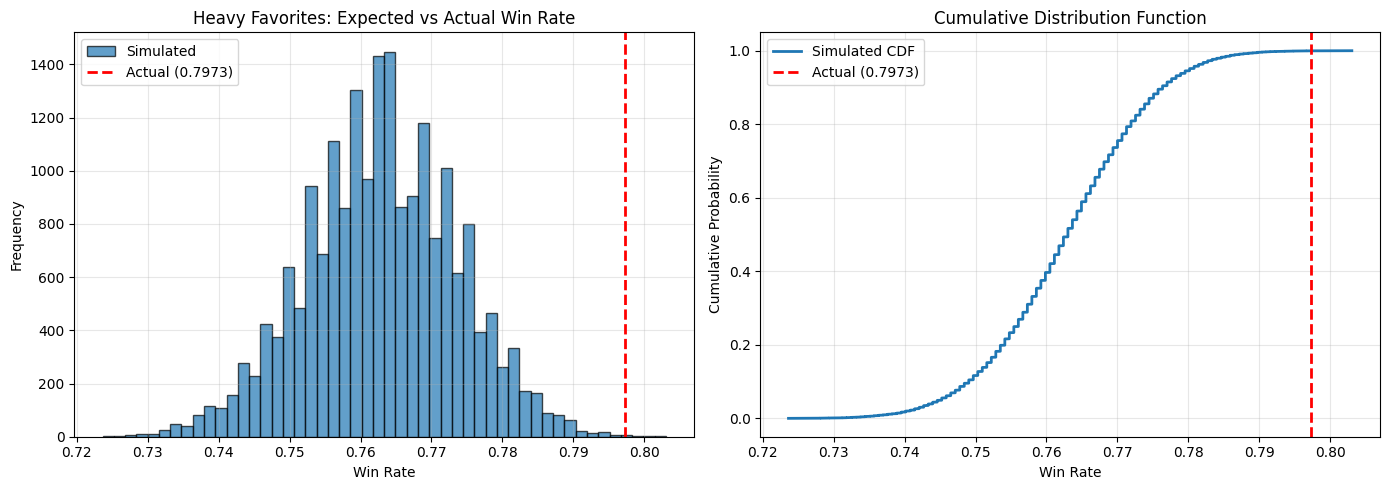


 Visualization saved: monte_carlo_analysis.png


In [18]:
import numpy as np
import matplotlib.pyplot as plt

print("Monte Carlo Simulation Visualization")
print("=" * 60)

# Prepare data
if "heavy_favs" not in globals():
    heavy_favs = dfgr2[dfgr2["FavOdds_fixed"] < HEAVY_FAV_THRESHOLD].copy()

p = heavy_favs["pFav_win"].clip(1e-6, 1-1e-6).to_numpy()
actual = heavy_favs["FavCorrect"].astype(int).to_numpy()

n = len(p)
actual_win_rate = actual.mean()

print(f"Heavy favorites: {n:,} matches")
print(f"Actual win rate:   {actual_win_rate:.4f}")
print(f"Expected win rate: {p.mean():.4f}")

# Monte Carlo
rng = np.random.default_rng(42)
N_SIMS = 20000

sim_wins = rng.binomial(1, p, size=(N_SIMS, n)).sum(axis=1)
sim_win_rate = sim_wins / n

print(f"\nSimulated mean: {sim_win_rate.mean():.4f}")
print(f"Simulated std:  {sim_win_rate.std():.4f}")

# Percentile
percentile = float((sim_win_rate < actual_win_rate).mean() * 100)

# P-values
W_obs = int(actual.sum())
p_left = float((sim_wins <= W_obs).mean())
p_right = float((sim_wins >= W_obs).mean())
p_two = float(min(1.0, 2 * min(p_left, p_right)))

print(f"\nPercentile: {percentile:.2f}")
print(f"P-values:")
print(f"  Underperform:  {p_left:.6f}")
print(f"  Overperform:   {p_right:.6f}")
print(f"  Two-sided:     {p_two:.6f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(sim_win_rate, bins=50, alpha=0.7, edgecolor='black', label='Simulated')
axes[0].axvline(actual_win_rate, color='red', linestyle='--', linewidth=2, 
                label=f'Actual ({actual_win_rate:.4f})')
axes[0].set_xlabel("Win Rate")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Heavy Favorites: Expected vs Actual Win Rate")
axes[0].legend()
axes[0].grid(alpha=0.3)

# CDF
sorted_sim = np.sort(sim_win_rate)
cdf = np.arange(1, len(sorted_sim) + 1) / len(sorted_sim)
axes[1].plot(sorted_sim, cdf, linewidth=2, label='Simulated CDF')
axes[1].axvline(actual_win_rate, color='red', linestyle='--', linewidth=2, 
                label=f'Actual ({actual_win_rate:.4f})')
axes[1].set_xlabel("Win Rate")
axes[1].set_ylabel("Cumulative Probability")
axes[1].set_title("Cumulative Distribution Function")
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig("monte_carlo_analysis.png", dpi=120, bbox_inches='tight')
plt.show()

print("\n Visualization saved: monte_carlo_analysis.png")

## 3.2 Visualization and Results

This section presents visual analysis of the Monte Carlo simulation results, comparing the distribution of simulated win rates with actual observed performance. The visualization includes histograms and cumulative distribution functions to assess where the actual performance falls within the expected range, providing graphical evidence for or against systematic deviations from market expectations.

In [19]:
import numpy as np
import pandas as pd


print("Team Based Analysis")
print("=" * 60)

# Prepare dataset
fav_df = dfgr2.copy()
fav_df["Team"] = np.where(
    fav_df["FavSide"] == "H", 
    fav_df["HomeTeam"], 
    fav_df["AwayTeam"]
)
fav_df["Actual_Win"] = fav_df["FavCorrect"].astype(int)
fav_df["Expected_Win_Prob"] = fav_df["pFav_win"].clip(1e-6, 1-1e-6)

# Team summary
team_summary = fav_df.groupby("Team").agg(
    Matches=("Actual_Win", "count"),
    Actual_Wins=("Actual_Win", "sum"),
    Actual_WinRate=("Actual_Win", "mean"),
    Expected_Wins=("Expected_Win_Prob", "sum"),
    Expected_WinRate=("Expected_Win_Prob", "mean"),
    Avg_FavOdds=("FavOdds_fixed", "mean"),
).reset_index()

team_summary["Gap_Wins"] = team_summary["Actual_Wins"] - team_summary["Expected_Wins"]
team_summary["Gap_Rate"] = team_summary["Actual_WinRate"] - team_summary["Expected_WinRate"]

# Minimum match filter
MIN_MATCHES = 20
team_summary_f = team_summary[team_summary["Matches"] >= MIN_MATCHES].copy()

print(f"\nTotal teams: {len(team_summary)}")
print(f"After min {MIN_MATCHES} match filter: {len(team_summary_f)} teams")

# Monte Carlo p-values
rng = np.random.default_rng(42)
N_SIMS = 10000

def mc_pvals(p_vec, w_obs, n_sims=N_SIMS):
    """Calculate p-value with Monte Carlo"""
    p_vec = np.asarray(p_vec)
    sim_w = rng.binomial(1, p_vec, size=(n_sims, len(p_vec))).sum(axis=1)
    p_left = (sim_w <= w_obs).mean()
    p_right = (sim_w >= w_obs).mean()
    p_two = min(1.0, 2 * min(p_left, p_right))
    return float(p_left), float(p_right), float(p_two)

# Calculate p-value for each team
grouped = fav_df.groupby("Team")
p_values = []

for team in team_summary_f["Team"]:
    g = grouped.get_group(team)
    p_vec = g["Expected_Win_Prob"].to_numpy()
    w_obs = int(g["Actual_Win"].sum())
    p_left, p_right, p_two = mc_pvals(p_vec, w_obs)
    p_values.append((p_left, p_right, p_two))

team_summary_f[["p_under", "p_over", "p_two"]] = p_values

# Reports
print("Most underperforming teams:")
print("=" * 60)

under = team_summary_f.sort_values(["p_under", "Gap_Wins"], ascending=[True, True]).head(15)
print(under[[
    "Team", "Matches", "Actual_Wins", "Expected_Wins", "Gap_Wins",
    "Actual_WinRate", "Expected_WinRate", "Gap_Rate", "Avg_FavOdds", "p_under", "p_two"
]].round(4).to_string(index=False))

print("\n")
print("Most overperforming teams:")
print("=" * 60)

over = team_summary_f.sort_values(["p_over", "Gap_Wins"], ascending=[True, False]).head(15)
print(over[[
    "Team", "Matches", "Actual_Wins", "Expected_Wins", "Gap_Wins",
    "Actual_WinRate", "Expected_WinRate", "Gap_Rate", "Avg_FavOdds", "p_over", "p_two"
]].round(4).to_string(index=False))


Team Based Analysis

Total teams: 210
After min 20 match filter: 183 teams
Most underperforming teams:
         Team  Matches  Actual_Wins  Expected_Wins  Gap_Wins  Actual_WinRate  Expected_WinRate  Gap_Rate  Avg_FavOdds  p_under  p_two
   Birmingham       74           22        32.0076  -10.0076          0.2973            0.4325   -0.1352       2.2265   0.0120 0.0240
       Yeovil       59           16        23.8380   -7.8380          0.2712            0.4040   -0.1328       2.3393   0.0251 0.0502
AFC Wimbledon       87           28        36.7530   -8.7530          0.3218            0.4224   -0.1006       2.2415   0.0322 0.0644
    Morecambe       43           11        16.9400   -5.9400          0.2558            0.3940   -0.1381       2.3853   0.0405 0.0810
      Granada       28            8        12.5490   -4.5490          0.2857            0.4482   -0.1625       2.1589   0.0605 0.1210
        Inter      156           78        87.6501   -9.6501          0.5000            0.561

## 3.3 Chi-Square Goodness of Fit Test

This section performs a Chi-Square Goodness of Fit test to evaluate whether the observed distribution of heavy favorite outcomes matches the expected distribution based on market probabilities.

### Hypotheses:

**Null Hypothesis (H₀):** The observed distribution of heavy favorite wins follows the expected distribution from market probabilities
- Formally: The categorical outcomes (Win/Non-Win) follow the proportions predicted by market odds

**Alternative Hypothesis (H₁):** The observed distribution significantly differs from the expected distribution
- This indicates systematic deviation from market predictions

### Methodology:
- **Test Statistic:** Chi-Square statistic measuring deviation between observed and expected frequencies
- **Test Type:** Goodness of Fit test for categorical outcomes
- **Binning Strategy:** Group matches by probability bins to ensure adequate expected frequencies
- **Significance Level:** α = 0.05

In [20]:
import numpy as np
import pandas as pd
from scipy import stats

print("Chi-Square Goodness of Fit Test for Heavy Favorites")
print("=" * 80)

# Use heavy favorites data
if "heavy_favs" not in globals():
    heavy_favs = dfgr2[dfgr2["FavOdds_fixed"] < HEAVY_FAV_THRESHOLD].copy()

# Create probability bins to ensure adequate expected frequencies
# Bins should have expected frequency >= 5 for chi-square validity
heavy_favs["prob_bin"] = pd.cut(
    heavy_favs["pFav_win"],
    bins=[0, 0.65, 0.70, 0.75, 0.80, 1.0],
    labels=["0-65%", "65-70%", "70-75%", "75-80%", "80-100%"]
)

print(f"\nTotal heavy favorite matches: {len(heavy_favs):,}")
print(f"\nDistribution across probability bins:")
print(heavy_favs["prob_bin"].value_counts().sort_index())

# Calculate observed and expected frequencies for each bin
results = []

for bin_name in heavy_favs["prob_bin"].cat.categories:
    bin_data = heavy_favs[heavy_favs["prob_bin"] == bin_name]
    
    if len(bin_data) == 0:
        continue
    
    # Observed
    n_matches = len(bin_data)
    observed_wins = int(bin_data["FavCorrect"].sum())
    observed_losses = n_matches - observed_wins
    
    # Expected
    expected_win_prob = bin_data["pFav_win"].mean()
    expected_wins = n_matches * expected_win_prob
    expected_losses = n_matches * (1 - expected_win_prob)
    
    results.append({
        "Bin": bin_name,
        "N_Matches": n_matches,
        "Observed_Wins": observed_wins,
        "Expected_Wins": expected_wins,
        "Observed_Losses": observed_losses,
        "Expected_Losses": expected_losses,
        "Obs_WinRate": observed_wins / n_matches,
        "Exp_WinRate": expected_win_prob
    })

results_df = pd.DataFrame(results)

print(f"\n" + "=" * 80)
print("Observed vs Expected Frequencies by Probability Bin")
print("=" * 80)
print(results_df.round(2).to_string(index=False))

# Prepare data for chi-square test
observed_freq = np.array(results_df[["Observed_Wins", "Observed_Losses"]].values.flatten())
expected_freq = np.array(results_df[["Expected_Wins", "Expected_Losses"]].values.flatten())

# Check validity condition (all expected frequencies >= 5)
min_expected = expected_freq.min()
print(f"\n" + "=" * 80)
print(f"Chi-Square Test Validity Check")
print("=" * 80)
print(f"Minimum expected frequency: {min_expected:.2f}")

if min_expected >= 5:
    print("✓ All expected frequencies >= 5 (test is valid)")
else:
    print("⚠ Some expected frequencies < 5 (results may be unreliable)")

# Perform chi-square test
chi2_stat, p_value = stats.chisquare(f_obs=observed_freq, f_exp=expected_freq)

# Degrees of freedom = (number of categories - 1) - (number of estimated parameters)
# We have 2 outcomes (Win/Loss) × number of bins, minus 1 constraint (total n)
n_bins = len(results_df)
df = 2 * n_bins - 1 - n_bins  # Simplified to n_bins - 1

print(f"\n" + "=" * 80)
print("Chi-Square Test Results")
print("=" * 80)
print(f"Chi-Square Statistic: {chi2_stat:.6f}")
print(f"Degrees of Freedom:   {df}")
print(f"P-value:              {p_value:.6f}")

# Critical value at α = 0.05
critical_value = stats.chi2.ppf(0.95, df)
print(f"Critical Value (α=0.05): {critical_value:.6f}")

# Interpretation
ALPHA = 0.05
print(f"\n" + "=" * 80)
print(f"Interpretation (α={ALPHA})")
print("=" * 80)

if p_value < ALPHA:
    print(f"✗ REJECT H₀ (p={p_value:.6f} < {ALPHA})")
    print("The observed distribution SIGNIFICANTLY DIFFERS from expected distribution")
    print("Heavy favorites do not perform according to market probabilities")
else:
    print(f"✓ FAIL TO REJECT H₀ (p={p_value:.6f} >= {ALPHA})")
    print("No significant difference between observed and expected distributions")
    print("Heavy favorites perform consistent with market probabilities")

# Effect size: Cramér's V
n_total = heavy_favs["FavCorrect"].count()
cramers_v = np.sqrt(chi2_stat / (n_total * (min(2, 2*n_bins) - 1)))
print(f"\nEffect Size (Cramér's V): {cramers_v:.4f}")

if cramers_v < 0.1:
    effect_interpretation = "negligible"
elif cramers_v < 0.3:
    effect_interpretation = "small"
elif cramers_v < 0.5:
    effect_interpretation = "medium"
else:
    effect_interpretation = "large"

print(f"Effect size interpretation: {effect_interpretation}")

Chi-Square Goodness of Fit Test for Heavy Favorites

Total heavy favorite matches: 1,574

Distribution across probability bins:
prob_bin
0-65%        0
65-70%     241
70-75%     501
75-80%     427
80-100%    405
Name: count, dtype: int64

Observed vs Expected Frequencies by Probability Bin
    Bin  N_Matches  Observed_Wins  Expected_Wins  Observed_Losses  Expected_Losses  Obs_WinRate  Exp_WinRate
 65-70%        241            180         166.18               61            74.82         0.75         0.69
 70-75%        501            374         362.12              127           138.88         0.75         0.72
 75-80%        427            347         330.80               80            96.20         0.81         0.77
80-100%        405            354         341.55               51            63.45         0.87         0.84

Chi-Square Test Validity Check
Minimum expected frequency: 63.45
✓ All expected frequencies >= 5 (test is valid)

Chi-Square Test Results
Chi-Square Statistic: 11.

Chi-Square Test Visualization


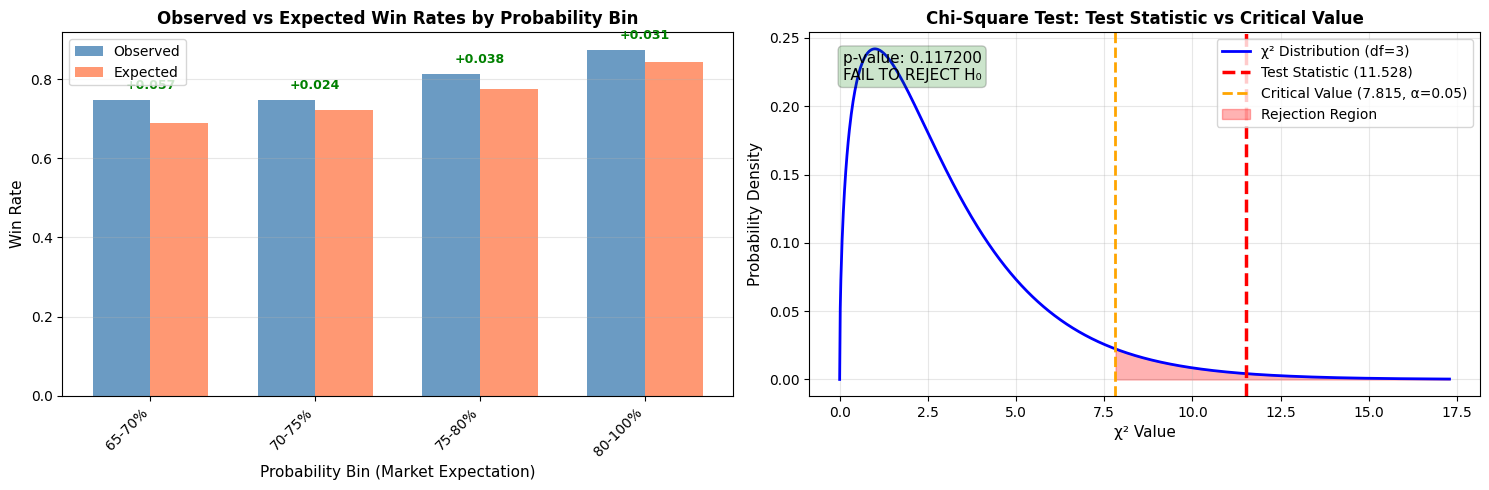


✓ Visualization saved: chi_square_goodness_of_fit.png


In [21]:
import matplotlib.pyplot as plt
import numpy as np

print("Chi-Square Test Visualization")
print("=" * 60)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Left plot: Observed vs Expected Win Rates by Bin
bins = results_df["Bin"].values
obs_rates = results_df["Obs_WinRate"].values
exp_rates = results_df["Exp_WinRate"].values

x = np.arange(len(bins))
width = 0.35

axes[0].bar(x - width/2, obs_rates, width, label='Observed', alpha=0.8, color='steelblue')
axes[0].bar(x + width/2, exp_rates, width, label='Expected', alpha=0.8, color='coral')
axes[0].set_xlabel("Probability Bin (Market Expectation)", fontsize=11)
axes[0].set_ylabel("Win Rate", fontsize=11)
axes[0].set_title("Observed vs Expected Win Rates by Probability Bin", fontsize=12, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(bins, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Add difference annotations
for i, (obs, exp) in enumerate(zip(obs_rates, exp_rates)):
    diff = obs - exp
    y_pos = max(obs, exp) + 0.02
    color = 'green' if diff > 0 else 'red'
    axes[0].text(i, y_pos, f'{diff:+.3f}', ha='center', va='bottom', 
                fontsize=9, color=color, fontweight='bold')

# Right plot: Chi-Square Distribution with Test Statistic
x_range = np.linspace(0, max(chi2_stat * 1.5, critical_value * 1.2), 1000)
chi2_pdf = stats.chi2.pdf(x_range, df)

axes[1].plot(x_range, chi2_pdf, 'b-', linewidth=2, label=f'χ² Distribution (df={df})')
axes[1].axvline(chi2_stat, color='red', linestyle='--', linewidth=2.5, 
               label=f'Test Statistic ({chi2_stat:.3f})')
axes[1].axvline(critical_value, color='orange', linestyle='--', linewidth=2, 
               label=f'Critical Value ({critical_value:.3f}, α=0.05)')

# Shade rejection region
x_reject = x_range[x_range >= critical_value]
y_reject = stats.chi2.pdf(x_reject, df)
axes[1].fill_between(x_reject, y_reject, alpha=0.3, color='red', 
                     label='Rejection Region')

axes[1].set_xlabel("χ² Value", fontsize=11)
axes[1].set_ylabel("Probability Density", fontsize=11)
axes[1].set_title("Chi-Square Test: Test Statistic vs Critical Value", fontsize=12, fontweight='bold')
axes[1].legend(loc='upper right')
axes[1].grid(alpha=0.3)

# Add p-value text
result_text = "REJECT H₀" if p_value < ALPHA else "FAIL TO REJECT H₀"
result_color = "red" if p_value < ALPHA else "green"
axes[1].text(0.05, 0.95, f'p-value: {p_value:.6f}\n{result_text}',
            transform=axes[1].transAxes, fontsize=11, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor=result_color, alpha=0.2))

plt.tight_layout()
plt.savefig("chi_square_goodness_of_fit.png", dpi=120, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved: chi_square_goodness_of_fit.png")